---
# ┗(•̀へ •́ )ﾉ Hyun's Machine Learning (Classification, DT, RF)
---
자 Classification, Decision Tree, Random Forest를 공부해봅시다 (´∇｀)  
## Authored by. Hyun
![미니언즈!](https://post-phinf.pstatic.net/MjAxNzA3MTBfMjIg/MDAxNDk5NjcxOTY1NDQw.Kz07JXiZg6AT6Y4PAZY7ubUNAr7rbDinLwFGuS0OOxcg.WVhpo8yfybUh0qImMGNAo1ucSUPuNOvQyzlO_vKlAlkg.JPEG/%EC%98%81%EC%A7%84%EC%9C%845.jpg?type=w1200)

# 목차

## 1. 차차 정리합세


## 0-2. Classfication

### Classification이란?
- Supervised Learning
- 기존 집단에 대한 특징을 학습한 뒤, 새로운 데이터가 들어왔을 때 그 데이터의 적합한 집단을 분류해주는 것

In [0]:
# SGD Classifier
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42) 
'''
GDClassifier는 randomness에 기반하기 때문에, 
고정 값을 정하고 싶다면, random_state parameter를 쓰자.
'''
sgd_clf.fit(X_train,y_train)

sgd_clf.predict(X_test)

y_pred = sgd_clf.predict(X_test)

f1_score(y_test,y_pred, average='micro')

In [0]:
# Xgboost Classifier
from xgboost import XGBClassifier, plot_importance

model = XGBClassifier()
model.fit(X_train, y_train)

model.predict(X_test)

y_pred = model.predict(X_test)

from sklearn.metrics import f1_score

f1_score(y_test,y_pred, average='weighted')

## 0-3. Decision tree

### Decision tree란?
- Decision tree는 데이터를 분석하여 이들 사이에 존재하는 패턴을 예측 가능한 규칙들의 조합으로 나타내며, 그 모양이 ‘나무’와 같다고 해서 decision tree라 불림
- 뿌리의 끝마디가 Terminal node, 뿌리의 마디가 Root node, 중간 마디가 Intermediate node!
- 의사결정나무는 분류(classification)와 회귀(regression) 모두 가능함  
[참조 github blog](https://ratsgo.github.io/machine%20learning/2017/03/26/tree/)  
![](http://i.imgur.com/ZKDnzOB.png)

> Classification
 - 새로운 데이터가 특정 terminal node에 속한다는 정보를 확인한 뒤, 해당 terminal node에서 가장 빈도가 높은 범주에 새로운 데이터를 분류하게 됨. 
 - 운동경기 예시에 적용해보면 날씨는 맑은데 습도가 70을 넘는 날은 경기가 열리지 않을 거라고 예측함

> Regression
 - 회귀의 경우 해당 terminal node의 종속변수(y)의 평균을 예측값으로 반환함!
 - 이 때 예측값의 종류는 terminal node 개수와 일치합니다. 
 - 만약 terminal node 수가 3개뿐이라면 새로운 데이터가 100개, 아니 1000개가 주어진다고 해도 의사결정나무는 딱 3종류의 답만을 출력하게 됨

> [DT의 공간 분할 법](http://i.imgur.com/THaJKeR.png)
- 이런 식으로 공간을 나누는 것!
<br>
<br>

### 어떤 기준으로 영역을 나누나?
- Decision tree는 구분 뒤 각 영역의 순도(homogeneity)가 증가, 불순도(impurity) 혹은 불확실성(uncertainty)이 최대한 감소하도록 하는 방향으로 학습을 진행
- 순도가 증가/불확실성이 감소하는 걸 두고 정보이론에서는 정보획득(information gain)이라 함
> 순도를 계산하는 3가지 방법
 - Entropy  
  : entropy 감소 = 불확실설 감소 = 순도 증가 = 정보획득
 - Gini Index  
  : $G.I(A)=\sum _{ i=1 }^{ d }{ { \left( { R }_{ i }\left( 1-\sum _{ k=1 }^{ m }{ { p }_{ ik }^{ 2 } }  \right)  \right)  } }$
 - Misclassification error  
  : 미분이 불가능해서 잘 안 쓰임


### 어떻게 학습이 되나?
 - 크게 2가지: 재귀적 분기 & 가지치기 
 > 재귀적 분기(recursive partitioning)
  - 한 변수 기준으로 정렬한다. 
  - 그 변수에 대해 가능한 모든 분기점에 대해 Entropy/Gini Index를 구해 분기 전과 비교해 정보획득을 조사함
  - 이후 분기 지점을 두번째 레코드로 두고 처음 두 개 레코드와 나머지 레코드 간의 entropy를 계산한 뒤 정보획득을 계산
  - 이렇게 순차적으로 계산한 뒤, 이번엔 다른 변수을 기준으로 정렬하고 다시 같은 작업을 반복합니다. 
  - 모든 경우의 수 가운데 정보획득이 가장 큰 변수와 그 지점을 택해 첫번째 분기를 하게 됩니다. 
  - 이후 또 같은 작업을 반복해 두번째, 세번째… 이렇게 분기를 계속 해 나가는 과정이 바로 의사결정나무의 학습이다!!!

 > 가지치기(pruning)
  - Full tree: 모든 terminal node의 순도가 100%인 상태
  - Full tree를 생성한 뒤 적절한 수준에서 terminal node를 결합해주어 overfitting을 방지해주는 방법

[Entropy Calculation example](https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8)

### 비용함수
- $CC(T)=Err(T)+\alpha \times L(T)$
 - CC(T)=의사결정나무의 비용 복잡도(=오류가 적으면서 terminal node 수가 적은 단순한 모델일 수록 작은 값)
 - ERR(T)=검증데이터에 대한 오분류율
 - L(T)=terminal node의 수(구조의 복잡도)
 - Alpha=ERR(T)와 L(T)를 결합하는 가중치(사용자에 의해 부여됨, 보통 0.01~0.1의 값을 씀)

In [0]:
## DT 예시 1
# 모델 만들어주기
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=1, max_depth=50)
model

# fitting 시키기
model.fit(x_train,y_train_re)
model.fit(x_train,y_train_ca)
model.fit(x_train,y_train)

# predict하기
model.predict(x_test)

Accuracy: 0.98


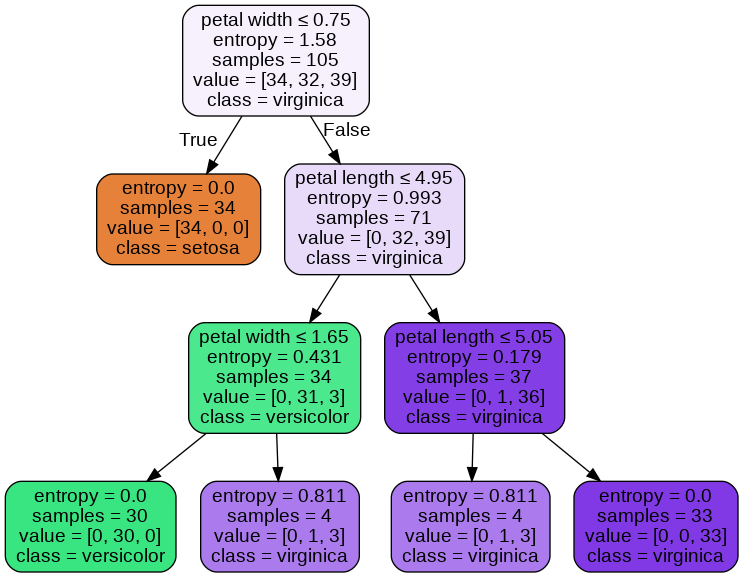

In [0]:
## DT 예시 2
from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# 자동으로 데이터셋을 분리해주는 함수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 데이터 표준화 작업
sc = StandardScaler()
sc.fit(X_train)

# 표준화된 데이터셋
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

iris_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
iris_tree.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(iris_tree, out_file=None, feature_names=['petal length', 'petal width'],
                          class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [0]:
### DT 예시 3
from sklearn.datasets import load_iris
iris = load_iris()

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

## Random Forest

#### Random Forest란?
- Decision tree를 모아놓은 ensemble 모델
- Random forest는 수많은 Decision tree가 모여 만들어진 숲이라고 생각하면 됨!
- 많은 decision tree의 의견을 다수결로 최종 결과를 반환

### 학습원리 
 1. 주어진 train data에서 무작위로 중복을 허용해 n개를 선택
 2. 선택한 n개의 data에서 데이터 feature를 중복 허용없이 d개를 선택
 3. 이를 바탕으로 decision tree로 학습
 4. 1~3을 k번 반복
 5. k개의 decision tree로 평균값 or 다수결로 최종 예측값을 결정

 ### 메소드 모음
 - **RandomForestClassifier ( n_estimators = 100 , criterion = ' gini ' , max_depth = None , min_samples_split = 2 , min_samples_leaf = 1 , min_weight_fraction_leaf = 0 , max_features = ' auto ' , max_leaf_nodes = None , min_impurity_decrease = 0 , min_impurity_split = None , bootstrap = True, oob_score = False , n_jobs = None, random_state = None , verbose = 0 , warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)** 
  - n_esitmators: 생성할 Decision Tree 개수
  - n_jobs: 학습을 수행하기 위한 병렬적으로 활용할 CPU 코어 개수
  - criterion: 정보 순도를 계산하기 위한 방법들. entropy, gini 중에 설정 가능
  - oob_score: 예측이 얼마나 정확한지에 대한 추정을 수치로 나타낸 것

In [0]:
## 예시 1
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_train, y_train)
 
# 예측
y_pred = forest.predict(x_test)
print(y_pred)
print(list(y_test))
 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

In [0]:
## 예시 2
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=iris.target_names, index=iris.target_names)
sns.heatmap(cm, annot=True)